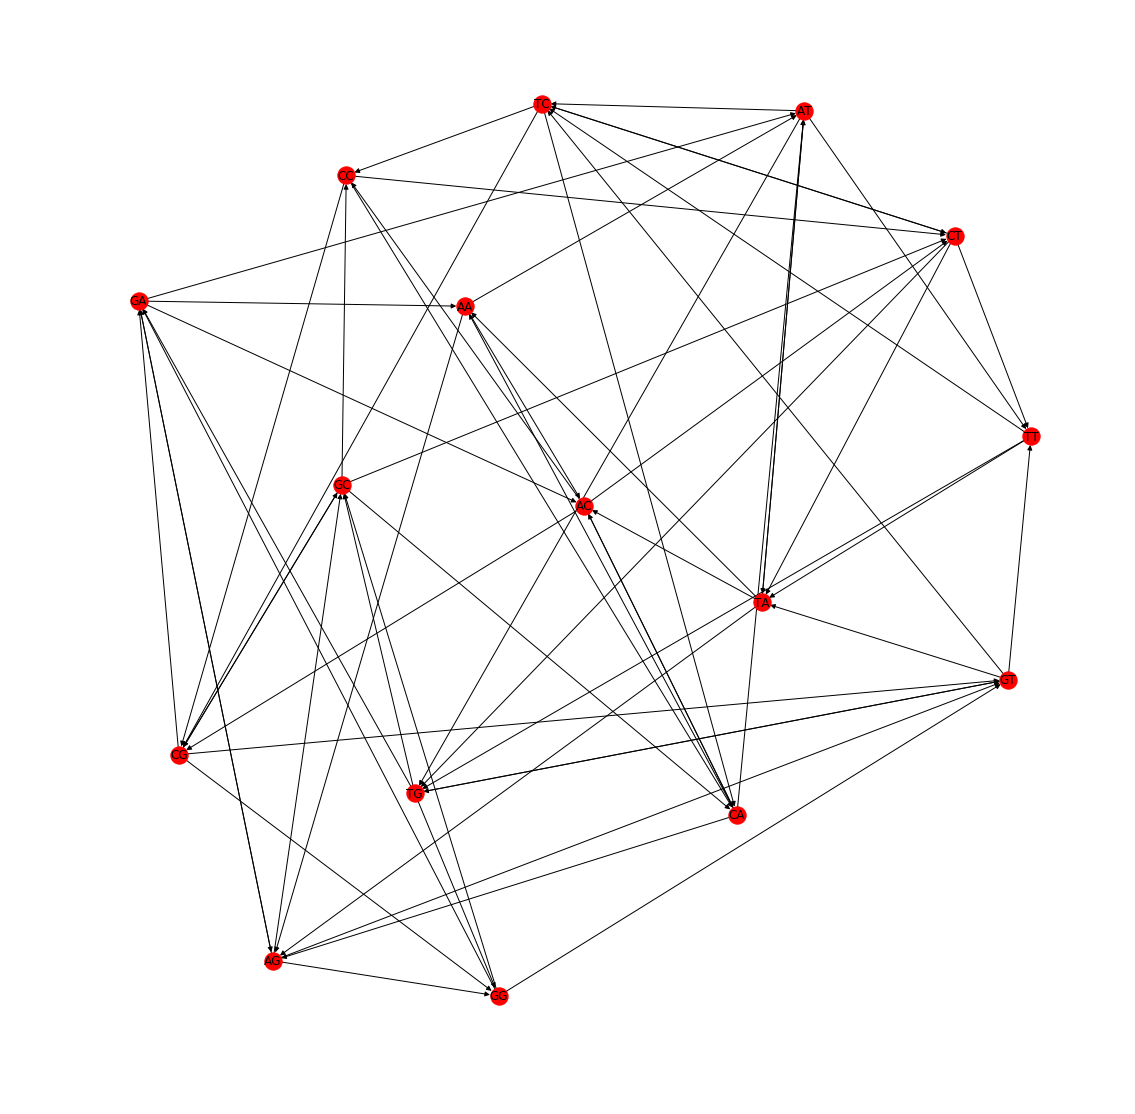

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

n = ["AA", "AC", "AG", "AT", "CA", "CC", "CG", "CT", "GA", "GC", "GG", "GT", "TA", "TC", "TG", "TT"]
            
def make_graph_dict(reads):
    graph = {}

    for a in reads:
        edges = []
        for b in reads:
            if a[1] == b[0]:
                edges.append(b)
                graph[a] = edges
                
    return graph           

def draw_graph(seq_graph):
    g = nx.DiGraph()
    g.add_nodes_from(seq_graph.keys())
    for k, v in seq_graph.items():
        g.add_edges_from(([(k, t) for t in v]))

    plt.figure(figsize=(15,15))
    nx.draw(g,with_labels=True)
    plt.draw()
    plt.show()
    return g

seq_graph = make_graph_dict(n)   
draw_graph(seq_graph)

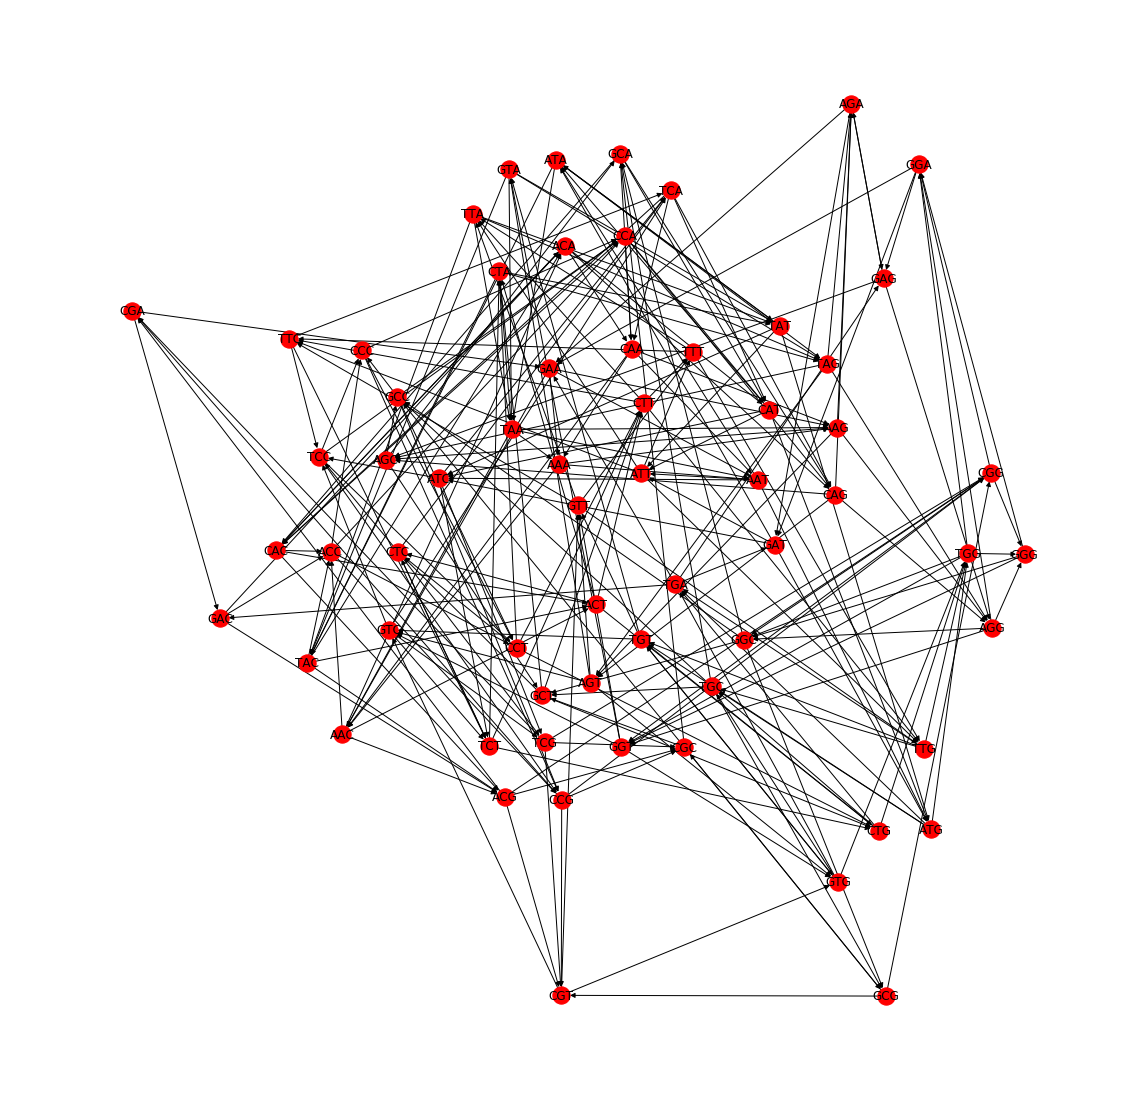

In [6]:
from collections import defaultdict
import random

def kmers(read, k=10):
    for n in range(len(read) - k + 1):
        yield read[n:n+k]
        
def make_de_bruijn_graph(string, k):
    k_mers = list(kmers(string, k))
    nodes = defaultdict(list)

    for kmer in k_mers:
        head = kmer[:-1]
        tail = kmer[1:]
        nodes[head].append(tail)
        
    return nodes

nodes = make_de_bruijn_graph("".join(random.choice("AGCT") for _ in range(1000)), 4)
draw_graph(nodes)